### Retrieving data from rivermap.ch API

Retrieving the latest flow of the Dranse de Thonon from rivermap.ch


In [1]:
from river_forecast.api_data_access import RivermapDataRetriever

In [2]:
rivermap_data = RivermapDataRetriever()

In [3]:
flow_df = rivermap_data.get_latest_river_flow(n_days=4, station='Dranse')

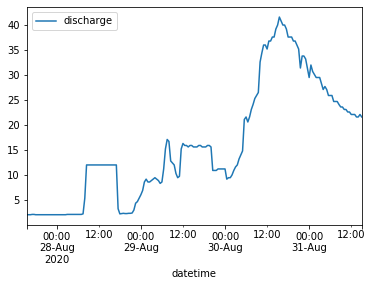

In [4]:
flow_df.plot()

In [5]:
flow_df

,discharge
datetime,
2020-08-27 15:30:00,2.04
2020-08-27 16:00:00,2.04
2020-08-27 16:30:00,2.04
2020-08-27 17:00:00,2.10
2020-08-27 17:30:00,2.10
...,...
2020-08-31 13:00:00,22.10
2020-08-31 13:30:00,21.60
2020-08-31 14:00:00,21.60


In [6]:
filled_flow_df = flow_df.asfreq('30min', method='bfill')

In [7]:
last_timestamp = filled_flow_df.index[-1]

In [8]:
import pandas as pd
last_timestamp - pd.Timedelta(days=3)

Timestamp('2020-08-28 15:00:00', freq='30T')

In [9]:
hourly_filled_flow_df = filled_flow_df.loc[(last_timestamp - pd.Timedelta(days=3, hours=-1)):last_timestamp].asfreq('H')

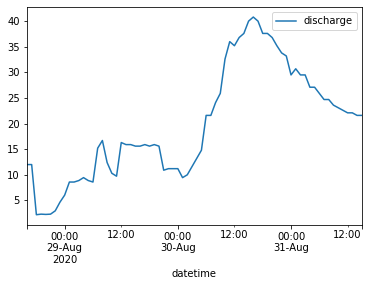

In [10]:
hourly_filled_flow_df.plot()

In [11]:
hourly_filled_flow_df

,discharge
datetime,
2020-08-28 16:00:00,12.00
2020-08-28 17:00:00,12.00
2020-08-28 18:00:00,2.21
2020-08-28 19:00:00,2.32
2020-08-28 20:00:00,2.27
...,...
2020-08-31 11:00:00,22.60
2020-08-31 12:00:00,22.10
2020-08-31 13:00:00,22.10
